## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import datetime as dt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy

%matplotlib inline

# Thin Ice Thickness from SMOS

## Dataset resources

**Authors** Huntemann, M., Heygster, G., Kaleschke, L., Krumpen, T., Mäkynen, M., Drusch, M.

**Year** 2018

**Institute** Institute of Environmental Physics, University of Bremen

**URL** https://seaice.uni-bremen.de

**Citeable Publication** Huntemann, M., Heygster, G., Kaleschke, L., Krumpen, T., Mäkynen, M., and Drusch, M.; *Empirical sea ice thickness retrieval during the freeze-up period from SMOS high incident angle observations*; The
Cryosphere, 8, 439-451, doi:10.5194/tc-8-439-2014, 2014.

## Reading example dataset

An NetCDF-file providing the arctic seaice thickness product of an arbitrary day (here 2018-10-29) was downloaded and saved in the working directory of this notebook. The file is opened using the netCDF4 module and the seaice thickness values read into memory.

In [ ]:
data = Dataset('./20181029_hvnorth_rfi_l1c.nc')
#print(data.variables['thickness'])
thickness = data.variables['thickness'][:]
thickness = ma.masked_less_equal(thickness, 0)
data.close()

## Plotting the dataset

Using the Cartopy module, the seaice thickness can be plotted onto a map. Using Cartopy's coordinate reference system module, a North-Polar-Stereographic projection is created and ocean and land masks read in from the built-in Natural Earth API.

The extent of the data array is set to match the [NSIDC projection convention](https://nsidc.org/ease/clone-ease-grid-projection-gt).

In [5]:
crs = ccrs.NorthPolarStereo(central_longitude=-45,true_scale_latitude=70)

land110m = cartopy.feature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='None', facecolor='k')
ocean110m = cartopy.feature.NaturalEarthFeature('physical', 'ocean', '110m', edgecolor='None', facecolor='lightgray')


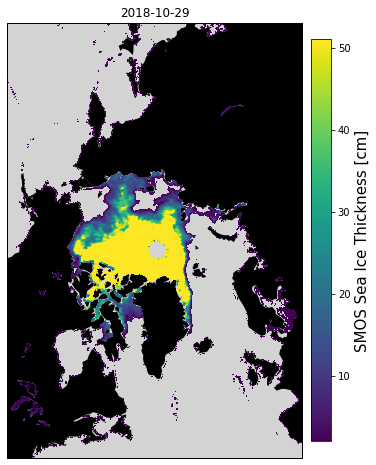

In [6]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection=crs)
ax.set_title('2018-10-29')
ax.add_feature(ocean110m)
ax.add_feature(land110m)
ax.set_extent([-3850000,3750000,-5350000,5850000],crs=crs)
im = ax.imshow(thickness, extent=[-3850000,3750000,-5350000,5850000], zorder=30)
cb = fig.colorbar(im, ax=ax, fraction=0.024, pad=0.01)
cb.set_label('SMOS Sea Ice Thickness [cm]', fontsize=15)